# week4-sessionn2 住宅価格の予測

# 2.住宅価格の回帰  
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。  
79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

House Prices: Advanced Regression Techniques  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## 今回使う手法の一覧  
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト  
分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

# 3.データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。  
House Prices: Advanced Regression Techniques | Kaggle  
    https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# 4.回帰問題の流れ  
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

## 練習のための準備  
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択  
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

### 1.1.1（解答）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_master = pd.read_csv("sample_dataset/house-prices-advanced-regression-techniques/train.csv")

X_data = df_master[['GrLivArea', 'YearBuilt']]
Y_data = df_master[["SalePrice"]]

print(f"xのデータ量:{X_data.shape[0]} 特微量:{X_data.shape[1]}")
print(f"xのデータ量:{Y_data.shape[0]} 特微量:{Y_data.shape[1]}")
print(X_data.head())
print(Y_data.head())

xのデータ量:1460 特微量:2
xのデータ量:1460 特微量:1
   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000
   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


### 1.2.1（追加）欠損値の確認

In [2]:
print(X_data.isnull().sum())
print(Y_data.isnull().sum())

GrLivArea    0
YearBuilt    0
dtype: int64
SalePrice    0
dtype: int64


# 【問題2】線形回帰による推定と評価  
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。  
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

### 2.1.1（解答）分析

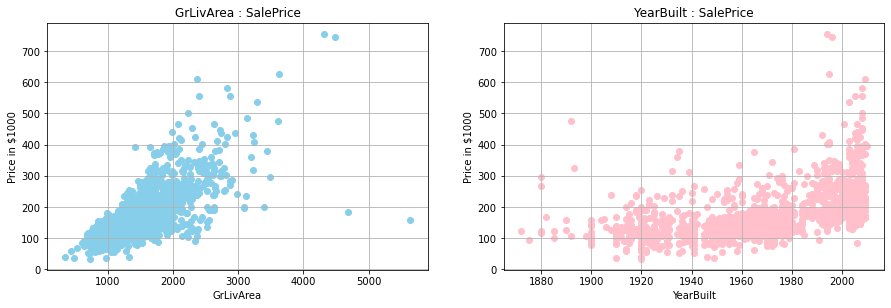

In [3]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.scatter(X_data['GrLivArea'], Y_data/1000, color="skyblue")
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price in $1000")
ax1.grid(True) 

ax2.scatter(X_data["YearBuilt"], Y_data/1000, color="pink")
ax2.set_title("YearBuilt : SalePrice")
ax2.set_xlabel("YearBuilt")
ax2.set_ylabel("Price in $1000")
ax2.grid(True)

### 2.2.1(解答）前処理(標準化なし）

In [4]:
# ndarray型に変換
x_data = np.array(X_data)
y_data = np.array(Y_data)

# 訓練、検証の分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)

In [5]:
print(f"特微量の訓練データ = {len(x_train)}  特微量の検証データ = {len(x_test)}\n{x_train[:5]}")
print(f"正解ラベルの訓練データ = {len(y_train)} 正解ラベルの検証データ = {len(y_test)}\n{y_train[:5]}")

特微量の訓練データ = 1095  特微量の検証データ = 365
[[2372 1892]
 [1472 1991]
 [ 960 1965]
 [1838 2005]
 [1309 1974]]
正解ラベルの訓練データ = 1095 正解ラベルの検証データ = 365
[[107500]
 [160000]
 [145000]
 [192140]
 [181000]]


### 2.3.1（予備知識）線形回帰

回帰分析とは、予測したい値（目的変数）を1つもしくは複数の変数（説明変数）を用いて予測する分析手法です。  
予測に使う特微量（**説明変数**）の数により１つであれば**単回帰分析**といい、複数の特微量を用いる場合は、**重回帰分析**という。  
また予測するしたいものを**目的変数**といいます。


### 2.3.2（予備知識） 平均二乗誤差（MSE：Mean Squared Error）

平均二乗誤差 (MSE)とは、実際の値と予測値の絶対値の2乗を平均したもので、値が小さいほど誤差の少ないモデルと言えます。
回帰問題において平均二乗誤差は最もメジャーな損失関数といえるでしょう。線形回帰モデルやニューラルネットワーク、決定木といった様々なモデルにおいて用いられます。平均二乗誤差の性質として外れ値に対して敏感であることが挙げられます。ですので、外れ値を含むデータに平均二乗誤差を用いてモデルを構築すると、予測結果が不安定になります。

数式では平均二乗誤差は以下のように表せます。
$$ MSE=\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\hat{y_i})^2$$

### 2.3.3（予備知識）平均二乗誤差の平方根（RMSE：Root Mean Squared Error）

二乗平均平方根誤差(RMSE) とは、上記のMSEに平方根をとることで計算されるものです。(※平均平方根二乗誤差と呼んだりもします。)  
二乗したことの影響を、平方根で補正しています。この値が小さければ小さいほど、誤差の小さいモデルであると言えます。  
数式では二乗平均平方根誤差は以下のように表せます。

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=0}^{n-1}(y_i – \hat{y_i})^2} $$

### 2.3.4（予備知識）　平均絶対誤差（MAE：Mean Absolute Error）

各データに対して「正解値と予測値の差（＝誤差）」*1の絶対値を計算し、その総和をデータ数で割った値（＝平均値）を表す。  
MSE（平均二乗誤差）の単位問題を回避する目的で使える利点があり、人間にとってシンプルで理解しやすい。解釈性を重要視するならば、回帰問題では後述のRMSEではなくこのMAEを使えばよい。またMAEは、RMSEよりも外れ値の影響を受けにくいという利点もある。  
欠点として、絶対値は数学計算で条件分岐が発生して数式が2つに分かれてしまう問題があり、特にその分岐地点では数学的に「微分不可能」になるという問題がある。また、後述のRMSEのように、誤差が大きくても、それほど過大には評価してくれないので、より評価しづらい指標ともいえるだろう。
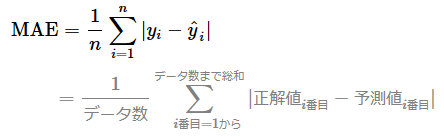

### 2.3.5（予備知識）　平均絶対誤差率（MAPE）

平均絶対パーセント誤差(MAPE)、別名平均絶対パーセント偏差(MAPD)は、トレンドの推定などの統計学の予測手法の予測精度を測る指標です。  
通常はパーセントで精度を表現し、以下の式で定義されます。


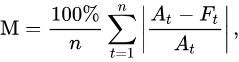

MAPEの概念はとてもシンプルで納得のいくものに思えますが、実際に使う場合は目立つ欠点がいくつかあります

- 0がデータに存在する場合、使えません。(需要データを扱う場合など、しばしば起こります。)ゼロで割ることになってしまうためです。
- 予測値が小さすぎる場合はパーセント誤差は100%を超えることはありません。しかし予測値が大きすぎる場合は、パーセント誤差は上限がなくなってしまいます。
- 予測精度を比較するメソッドとして使われているMAPEは、系統的には予測値がとても小さい場合に対するメソッドです。その意味でMAPEにはバイアスがかけられています。このあ  まり知られていませんが、重大な問題はAccuracy Ratioと呼ばれる、予測値の実測値に対する比に基づいた指標を用いることで克服できます。このアプローチをとることでさらに優れた統計的手順を踏むことができ、幾何平均[1]の観点で解釈できる予測を導けます。

### 2.3.6（予備知識） 決定係数

決定係数(R2)とは、推定された回帰式の当てはまりの良さ（度合い）を表します。  
0から1までの値を取り、1に近いほど、回帰式が実際のデータに当てはまっていることを表しており、説明変数が目的変数を説明していると言えます。  
逆に0に近ければあまり良くない性能であることを示します。  
$$ R^2 = 1 - \frac{\sum_{i=0}^{n-1}(y_i - \hat{y_i})^2}{\sum_{i=0}^{n-1}(y_i - \bar{y_i})^2}$$

### 2.4.1（解答）線形回帰

In [6]:
from sklearn.linear_model import LinearRegression # 線形回帰 インポート

GrLivArea_train = x_train[:,[0]]
GrLivArea_test = x_test[:,[0]]
YearBuilt_train = x_train[:,[1]]
YearBuilt_test = x_test[:,[1]]

def senkeikaiki(x1, x, y = y_train, model= LinearRegression()):
    
    # 学習
    model = model.fit(x,y)

    # 予測
    y_pred = model.predict(np.array(x1).reshape(-1,1))
    return y_pred

In [7]:
breadth = int(input("GrLivArea(リビングの広さ)はいつくですか？ :"))
year = int(input("YearBuilt(建設年)は何年ですか？ :"))

gla = senkeikaiki(x1 = breadth, x = GrLivArea_train)
yb = senkeikaiki(x1 = year, x = YearBuilt_train)

print(f"GrLivArea(リビングの広さ)が{breadth}の時、価格は ${gla} と予測されます")
print(f"YearBuilt(建設年)が{year}年の時、価格は ${yb} と予測されます")

GrLivArea(リビングの広さ)はいつくですか？ : ２０００
YearBuilt(建設年)は何年ですか？ : ２０００


GrLivArea(リビングの広さ)が2000の時、価格は $[[233605.82265906]] と予測されます
YearBuilt(建設年)が2000年の時、価格は $[[220425.29108009]] と予測されます


### 2.4.2（解答） 学習モデルの評価

In [8]:
# import
from sklearn.metrics import mean_squared_error    # 平均二乗誤差 インポート
from sklearn.metrics import mean_absolute_error   # 平均絶対誤差 インポート
from sklearn.metrics import r2_score              # 決定係数 インポート

In [9]:
# score関数
def score(y, y1 = y_test):
    mse = mean_squared_error(y1, y)
    rmse = np.sqrt(mean_squared_error(y1, y))
    mae = mean_absolute_error(y1, y)
    mape = np.mean(np.abs((y1 - y) / y)) * 100
    r2 = r2_score(y1, y)
    score_dict = {"mse":mse, "rmse":rmse, "mae":mae, "mape":mape, "r2":r2}
    return score_dict

In [10]:
# 線形回帰 → アンパック
gla_a = senkeikaiki(x1 =GrLivArea_test , x = GrLivArea_train)
score_dict_gla = score(y = gla_a)
yb_a = senkeikaiki(x1 = YearBuilt_test, x = YearBuilt_train)
score_dict_yb= score(y = yb_a)

# 辞書から出力
print("☆☆GrLivArea_testの評価")
for (k,v) in enumerate(score_dict_gla.items()): 
    print(f"{v[0]:5} : {v[1]:.2f}")
print("★★YearBuilt_testの評価")
for (k,v) in enumerate(score_dict_yb.items()): 
    print(f"{v[0]:5} : {v[1]:.2f}")

☆☆GrLivArea_testの評価
mse   : 3705065901.95
rmse  : 60869.25
mae   : 38825.03
mape  : 19.97
r2    : 0.44
★★YearBuilt_testの評価
mse   : 4830018416.25
rmse  : 69498.33
mae   : 47433.48
mape  : 26.91
r2    : 0.27


### 2.4.3（予備知識） 線形モデルの確認

In [11]:
# GrLivArea線形モデル
lr_plot = LinearRegression()
X = GrLivArea_test  # 説明変数（Numpyの配列）
Y = gla_a           # 目的変数（Numpyの配列）
lr_plot.fit(X, Y)        # 線形モデルの重みを学習

print('coefficient = ', lr_plot.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr_plot.intercept_) # 切片を出力

# YearBuilt線形モデル
lr1_plot = LinearRegression()
X1 = YearBuilt_test  # 説明変数（Numpyの配列）
Y1 = yb_a           # 目的変数（Numpyの配列）
lr1_plot.fit(X1, Y1)        # 線形モデルの重みを学習

print('coefficient = ', lr1_plot.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr1_plot.intercept_) # 切片を出力

coefficient =  [110.42073095]
intercept =  [12764.36075362]
coefficient =  [1368.99630631]
intercept =  [-2517567.32153814]


### 2.4.4（解答） scatterplotの描写

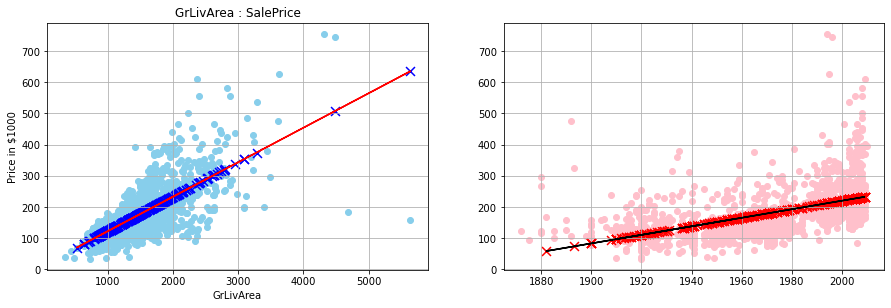

In [12]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.scatter(X_data['GrLivArea'], Y_data/1000, color="skyblue")
ax1.scatter(GrLivArea_test, gla_a/1000, color="blue", marker="x", s=80) # 線形回帰の検証データを出力
ax1.plot(X, lr_plot.predict(X)/1000, color = 'red') # 回帰直線をプロット
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price in $1000")
ax1.grid(True) 

ax2.scatter(X_data["YearBuilt"], Y_data/1000, color="pink")
ax2.scatter(YearBuilt_test, yb_a/1000, color="red", marker="x", s=80) # 線形回帰の検証データを出力
ax2.plot(X1, lr1_plot.predict(X1)/1000, color = 'black') # 回帰直線をプロット

ax2.grid(True)

### 2.5.1（予備知識）seabornでの線形回帰の描写

Text(0.5, 1.0, 'GrLivArea : alePrice')

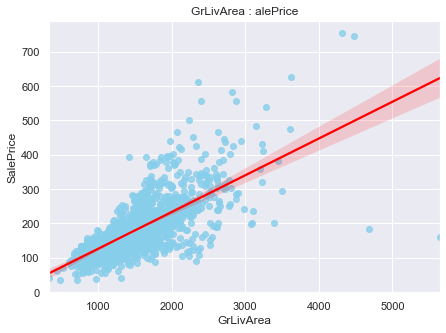

In [13]:
import seaborn as sns
sns.set()

fig, axes = plt.subplots(figsize=(7,5))

sns.regplot(X_data['GrLivArea'], Y_data/1000, color="skyblue", line_kws={"color":"red"})
axes.set_title("GrLivArea : alePrice")

Text(0.5, 1.0, 'YearBuilt : alePrice')

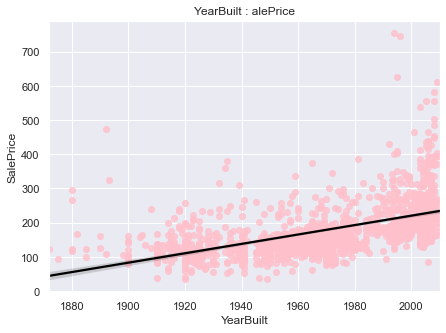

In [14]:
fig, axes = plt.subplots(figsize=(7, 5)) 

sns.regplot(X_data['YearBuilt'], Y_data/1000, color="pink", line_kws={"color":"black"})
axes.set_title("YearBuilt : alePrice")

### 2.6.1 （予備知識） 2つの特微量で線形回帰

In [15]:
def senkeikaiki1(x1, x, y = y_train, model= LinearRegression()):
    # 学習
    model = model.fit(x,y)

    # 予測
    y_pred = model.predict(x1)
    return y_pred

In [16]:
predicted_value_list = senkeikaiki1(x1 = x_test, x = x_train)
print(f"特微量 : {x_test[1]}  予測値 : ${int(predicted_value_list[1])}  実際値 : ${int(y_test[1])}")
print(f"特微量 : {x_test[2]}  予測値 : ${int(predicted_value_list[2])}  実際値 : ${int(y_test[2])}")
print(f"特微量 : {x_test[3]}  予測値 : ${int(predicted_value_list[3])}  実際値 : ${int(y_test[3])}")

特微量 : [1578 1941]  予測値 : $155093  実際値 : $133000
特微量 : [1203 1950]  予測値 : $127493  実際値 : $110000
特微量 : [2022 1977]  予測値 : $236349  実際値 : $192000


In [17]:
breadth = int(input("GrLivArea(リビングの広さ)はいつくですか？ :"))
year = int(input("YearBuilt(建設年)は何年ですか？ :"))

predicted_value = senkeikaiki1(x1 = np.array([breadth, year]).reshape(1,-1), x = x_train)

print(f"GrLivArea(リビングの広さ)が{breadth}で、YearBuilt(建設年)が{year}年の時、価格は ${predicted_value} と予測されます")

GrLivArea(リビングの広さ)はいつくですか？ : ２０００
YearBuilt(建設年)は何年ですか？ : ２０００


GrLivArea(リビングの広さ)が2000で、YearBuilt(建設年)が2000年の時、価格は $[[258128.13701401]] と予測されます


In [18]:
# 線形回帰 → アンパック
score_dict = score(y = predicted_value_list)

# 辞書から出力
print("☆☆ GrLivArea & YearBuilt_test 評価")
for (k,v) in enumerate(score_dict.items()): 
    print(f"{v[0]:5} : {v[1]:.2f}")

☆☆ GrLivArea & YearBuilt_test 評価
mse   : 2725908099.06
rmse  : 52210.23
mae   : 31844.33
mape  : 17.62
r2    : 0.59


In [19]:
# GrLivArea線形モデル
pv_plot = LinearRegression()
X = GrLivArea_test  # 説明変数（Numpyの配列）
Y = predicted_value_list # 目的変数（Numpyの配列）
pv_plot.fit(X, Y)        # 線形モデルの重みを学習

print('coefficient = ', pv_plot.coef_[0]) # 説明変数の係数を出力
print('intercept = ', pv_plot.intercept_) # 切片を出力

# YearBuilt線形モデル
pv1_plot = LinearRegression()
X1 = YearBuilt_test  # 説明変数（Numpyの配列）
Y1 = predicted_value_list # 目的変数（Numpyの配列）
pv1_plot.fit(X1, Y1)        # 線形モデルの重みを学習

print('coefficient = ', pv1_plot.coef_[0]) # 説明変数の係数を出力
print('intercept = ', pv1_plot.intercept_) # 切片を出力

coefficient =  [110.78027393]
intercept =  [13584.472107]
coefficient =  [1425.45952686]
intercept =  [-2631509.12806734]


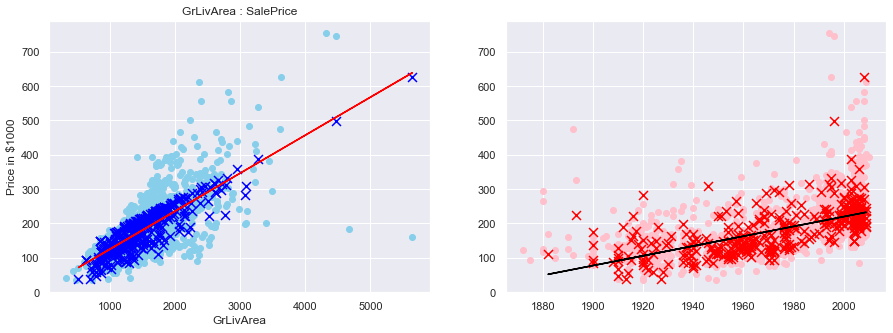

In [20]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(X_data['GrLivArea'], Y_data/1000, color="skyblue")
ax1.scatter(GrLivArea_test, predicted_value_list/1000, color="blue", marker="x", s=80) # 線形回帰の検証データを出力
ax1.plot(X, pv_plot.predict(X)/1000, color = 'red') # 回帰直線をプロット
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price in $1000")
ax1.grid(True) 

ax2.scatter(X_data["YearBuilt"], Y_data/1000, color="pink")
ax2.scatter(YearBuilt_test, predicted_value_list/1000, color="red", marker="x", s=80) # 線形回帰の検証データを出力
ax2.plot(X1, pv1_plot.predict(X1)/1000, color = 'black') # 回帰直線をプロット

ax2.grid(True)

# 【問題3】手法の比較  
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

### 3.1.1（解答） 線形回帰 (標準化あり）

In [21]:
# 標準化
from sklearn.preprocessing import StandardScaler
# GrLivArea 標準化
scaler = StandardScaler()
scaler.fit(GrLivArea_train) 
GrLivArea_train_std = scaler.transform(GrLivArea_train)
GrLivArea_test_std = scaler.transform(GrLivArea_test)

# YearBuilt 標準化
scaler1 = StandardScaler()
scaler1.fit(YearBuilt_train) 
YearBuilt_train_std = scaler1.transform(YearBuilt_train)
YearBuilt_test_std = scaler1.transform(YearBuilt_test)

# SalePrice 標準化
scaler2 = StandardScaler()
scaler2.fit(y_train) 
y_train_std = scaler2.transform(y_train)
y_test_std = scaler2.transform(y_test)

In [22]:
print(f"GrLivAreaの訓練データ = {len(GrLivArea_train_std)}  GrLivAreaの検証データ = {len(GrLivArea_test_std)}")
print(f"YearBuiltの訓練データ = {len(YearBuilt_train_std)}  YearBuiltの検証データ = {len(YearBuilt_test_std)}")
print(f"SalePriceの訓練データ = {len(y_train)} SalePriceの検証データ = {len(y_test)}")

GrLivAreaの訓練データ = 1095  GrLivAreaの検証データ = 365
YearBuiltの訓練データ = 1095  YearBuiltの検証データ = 365
SalePriceの訓練データ = 1095 SalePriceの検証データ = 365


In [23]:
breadth = int(input("GrLivArea(リビングの広さ)はいつくですか？ :"))
year = int(input("YearBuilt(建設年)は何年ですか？ :"))

# 指定した値を標準化
breadth_std = scaler.transform(np.array(breadth).reshape(-1,1))
year_std = scaler1.transform(np.array(year).reshape(-1,1))

gla_std = senkeikaiki(x1= breadth_std, x = GrLivArea_train_std, y = y_train_std)
yb_std = senkeikaiki(x1 = year_std, x = YearBuilt_train_std, y = y_train_std)

# 予測データを標準化状態から元に戻す
ngla = scaler2.inverse_transform(gla_std)
nyb = scaler2.inverse_transform(yb_std)

print(f"GrLivArea(リビングの広さ)が{breadth}の時、価格は ${ngla} と予測されます")
print(f"YearBuilt(建設年)が{year}年の時、価格は ${nyb} と予測されます")

GrLivArea(リビングの広さ)はいつくですか？ : ２０００
YearBuilt(建設年)は何年ですか？ : ２０００


GrLivArea(リビングの広さ)が2000の時、価格は $[[233605.82265906]] と予測されます
YearBuilt(建設年)が2000年の時、価格は $[[220425.29108009]] と予測されます


In [24]:
# 線形回帰 → アンパック
gla_std_a = senkeikaiki(x1 =GrLivArea_test_std, x = GrLivArea_train_std, y = y_train_std)
score_dict_gla_std = score(gla_std_a, y1 = y_test_std)
yb_std_a = yb = senkeikaiki(x1 = YearBuilt_test_std, x = YearBuilt_train_std, y = y_train_std)
score_dict_yb_std= score(yb_std_a, y1 = y_test_std)

pf_gla = pd.DataFrame(score_dict_gla_std.values(), index = score_dict_gla_std.keys())
pf_gla = pf_gla.rename(columns = {0:"GrLivArea_score"})

pf_yb = pd.DataFrame(score_dict_yb_std.values(), index = score_dict_yb_std.keys())
pf_yb = pf_yb.rename(columns = {0:"YearBuilt_score"})

pf =pd.concat([pf_gla, pf_yb],1)
                    
pf

,GrLivArea_score,YearBuilt_score
mse,0.596795,0.777997
rmse,0.772525,0.882042
mae,0.492750,0.602004
mape,328.151035,16058.136635
r2,0.438789,0.268392


In [25]:
# GrLivArea線形モデル
lr2_plot = LinearRegression()
X = GrLivArea_test_std  # 説明変数（Numpyの配列）
Y = gla_std_a           # 目的変数（Numpyの配列）
lr2_plot.fit(X, Y)        # 線形モデルの重みを学習

print('coefficient = ', lr2_plot.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr2_plot.intercept_) # 切片を出力

# YearBuilt線形モデル
lr3_plot = LinearRegression()
X1 = YearBuilt_test_std  # 説明変数（Numpyの配列）
Y1 = yb_std_a           # 目的変数（Numpyの配列）
lr3_plot.fit(X1, Y1)        # 線形モデルの重みを学習

print('coefficient = ', lr3_plot.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr3_plot.intercept_) # 切片を出力

coefficient =  [0.72374775]
intercept =  [3.46944695e-17]
coefficient =  [0.52457023]
intercept =  [-1.56125113e-15]


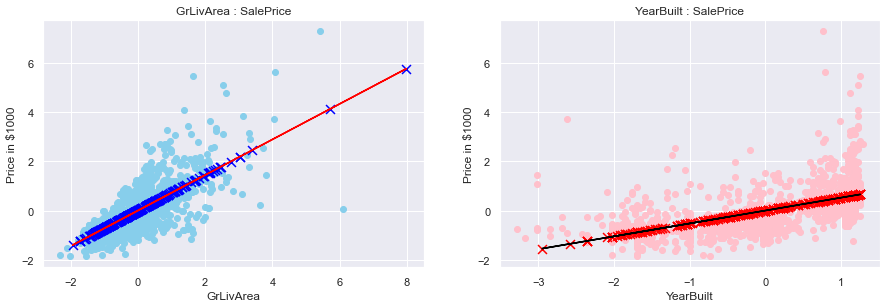

In [26]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.scatter(GrLivArea_train_std, y_train_std, color="skyblue")
ax1.scatter(GrLivArea_test_std, gla_std_a, color="blue", marker="x", s=80) # 線形回帰の検証データを出力
ax1.plot(X, lr2_plot.predict(X), color = 'red') # 回帰直線をプロット
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price in $1000")
ax1.grid(True) 

ax2.scatter(YearBuilt_train_std, y_train_std, color="pink")
ax2.scatter(YearBuilt_test_std, yb_std_a, color="red", marker="x", s=80) # 線形回帰の検証データを出力
ax2.plot(X1, lr3_plot.predict(X1), color = 'black') # 回帰直線をプロット
ax2.set_title("YearBuilt : SalePrice")
ax2.set_xlabel("YearBuilt")
ax2.set_ylabel("Price in $1000")
ax2.grid(True)

### 3.2.1（解答） 線形回帰

In [76]:
import statsmodels.api as sm 

def senkeikaiki2(model, x1 = x_test, x = x_train, y = y_train.ravel()):
    
    # 学習
    model = model.fit(x,y)
    y_pred = model.predict(x1)
    
    # 予測
    for i in range(1,4):
        print(f"特微量 : {x_test[i]}  予測値 : ${int(y_pred[i])}  実際値 : ${int(y_test[i])}")
    
    # 評価
    score_list = score(y_pred)
    pf = pd.DataFrame(score_list.values(), index = score_list.keys())
    pf = pf.rename(columns = {0:"score"})
    print(pf)
    
    # GrLivArea_test線形モデル
    pv_plot = model
    X = GrLivArea_test
    Y = y_pred
    pv_plot.fit(X, Y)
    print('coefficient = ', pv_plot.coef_[0])
    print('intercept = ', pv_plot.intercept_)

    # YearBuilt線形モデル
    pv1_plot = model
    X1 = x_test[:,1].reshape(-1,1)
    Y1 = y_pred
    pv1_plot.fit(X1, Y1)
    print('coefficient = ', pv1_plot.coef_[0])
    print('intercept = ', pv1_plot.intercept_)
    
    # 製図構成
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.scatter(X_data['GrLivArea'], Y_data/1000, color="skyblue")
    ax1.scatter(X, y_pred/1000, color="blue", marker="x", s=80)
    ax1.plot(GrLivArea_test, pv_plot.predict(X)/1000, color = 'red')
    ax1.set_title("GrLivArea : SalePrice")
    ax1.set_xlabel("GrLivArea")
    ax1.set_ylabel("Price in $1000")
    ax1.grid(True)

    ax2.scatter(X_data["YearBuilt"], Y_data/1000, color="pink")
    ax2.scatter(X1, y_pred/1000, color="red", marker="x", s=80)
    ax2.plot(X1, pv1_plot.predict(X1)/1000, color = 'black')
    ax2.set_title("YearBuilt : SalePrice")
    ax2.set_xlabel("YearBuilt")
    ax2.set_ylabel("Price in $1000")
    ax2.grid(True)

特微量 : [1578 1941]  予測値 : $155093  実際値 : $133000
特微量 : [1203 1950]  予測値 : $127493  実際値 : $110000
特微量 : [2022 1977]  予測値 : $236349  実際値 : $192000
             score
mse   2.725908e+09
rmse  5.221023e+04
mae   3.184433e+04
mape  5.086441e+01
r2    5.871035e-01
coefficient =  110.78027393433366
intercept =  13584.472106995003
coefficient =  1425.4595268636817
intercept =  -2631509.1280673444


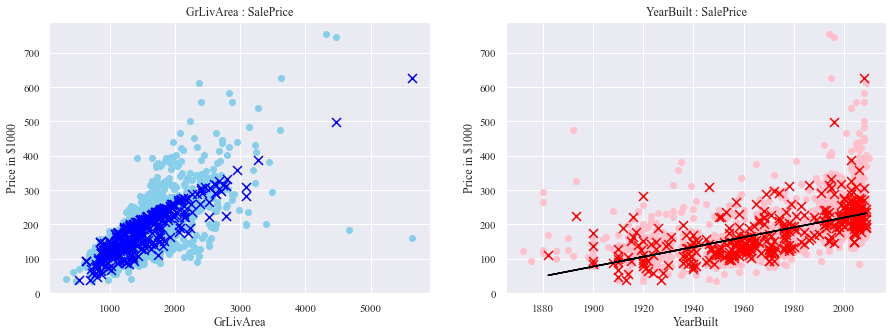

In [77]:
senkeikaiki2(LinearRegression())

### 3.2.2（解答） 線形回帰 ３次元描写

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

def senkeikaiki3(model, x1 = x_test, x = x_train, y = y_train):    
    # 学習
    model = model.fit(x,y)
    y_pred = model.predict(x1)
    # 予測
    for i in range(1,4):
        print(f"特微量 : {x_test[i]}  予測値 : ${int(y_pred[i])}  実際値 : ${int(y_test[i])}")
    # 評価
    score_list = score(y_pred)
    pf = pd.DataFrame(score_list.values(), index = score_list.keys())
    pf = pf.rename(columns = {0:"score"})
    print(pf)
    
    # データを用意する
    X = x_test[:,0]    # 説明変数（Numpyの配列）
    Y = x_test[:,1]    # 説明変数（Numpyの配列）
    Z = y_pred

    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] =1
    plt.rcParams['font.family'] = 'Times New Roman'

    # グラフの入れ物を用意する。
    fig = plt.figure()
    ax1 = Axes3D(fig)

    # 軸のラベルを設定する。
    ax1.set_xlabel('GrLivArea')
    ax1.set_ylabel('YearBuilt')
    ax1.set_zlabel('Price in $1000')

    # データプロットする。
    ax1.scatter3D(X, Y, Z, label='Dataset')
    plt.legend()

    # グラフを表示する。
    plt.show()
    plt.close()    

特微量 : [1578 1941]  予測値 : $155093  実際値 : $133000
特微量 : [1203 1950]  予測値 : $127493  実際値 : $110000
特微量 : [2022 1977]  予測値 : $236349  実際値 : $192000
             score
mse   2.725908e+09
rmse  5.221023e+04
mae   3.184433e+04
mape  1.762012e+01
r2    5.871035e-01


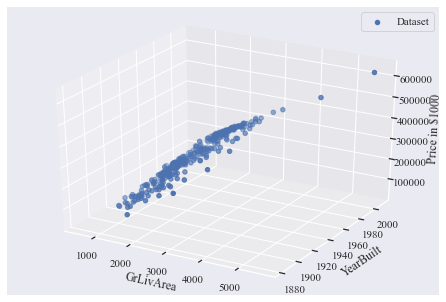

In [30]:
senkeikaiki3(LinearRegression())

### 3.3.1（解答）SVM

特微量 : [1578 1941]  予測値 : $155901  実際値 : $133000
特微量 : [1203 1950]  予測値 : $131499  実際値 : $110000
特微量 : [2022 1977]  予測値 : $223944  実際値 : $192000
             score
mse   2.763023e+09
rmse  5.256447e+04
mae   3.085175e+04
mape  4.558879e+01
r2    5.814816e-01
coefficient =  [97.87821617]
intercept =  [32778.799907]
coefficient =  [1025.61445955]
intercept =  [-1854482.3695139]


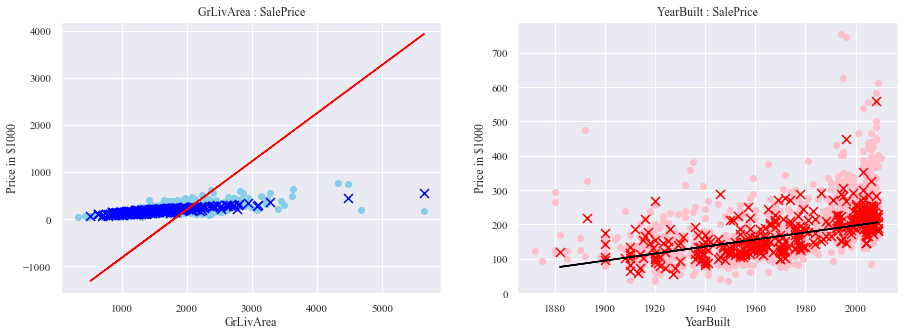

In [31]:
# インストール
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
# アルゴリズムを指定
regr = SVR(C=1.0, kernel='linear', epsilon=0.1)
# 学習検証
senkeikaiki2(regr)

### 3.4.1（解答）決定木

Automatically created module for IPython interactive environment
特微量 : [1578 1941]  予測値 : $174500  実際値 : $133000
特微量 : [1203 1950]  予測値 : $125000  実際値 : $110000
特微量 : [2022 1977]  予測値 : $144000  実際値 : $192000
             score
mse   2.886873e+09
rmse  5.372963e+04
mae   3.605709e+04
mape  5.162767e+01
r2    5.627221e-01


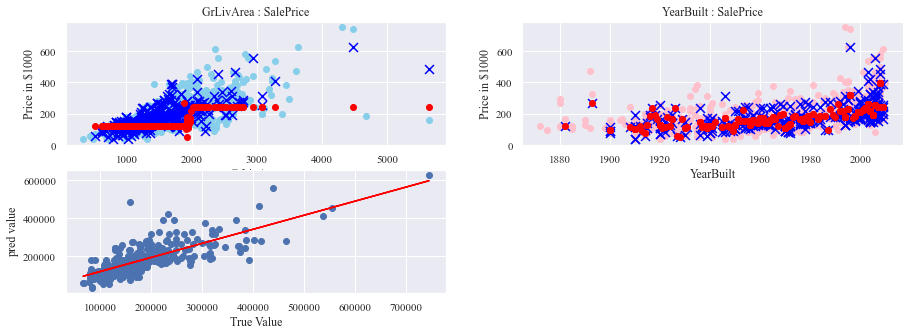

In [75]:
print(__doc__)

# インストール
from sklearn.tree import DecisionTreeRegressor

# データセット

x = x_train
y = y_train.ravel()
x1 = x_test
y1 = y_test

# アルゴリズムを指定
regr = DecisionTreeRegressor(max_depth = 100)

# 学習
regr = regr.fit(x,y)

# 予測
y_pred = regr.predict(x1)
    
# 確認
for i in range(1,4):
    print(f"特微量 : {x_test[i]}  予測値 : ${int(y_pred[i])}  実際値 : ${int(y_test[i])}")
    
# 評価
score_list = score(y_pred)
pf = pd.DataFrame(score_list.values(), index = score_list.keys())
pf = pf.rename(columns = {0:"score"})
print(pf)

# 確認
# breadth = int(input("GrLivArea(リビングの広さ)はいつくですか？ :"))
# year = int(input("YearBuilt(建設年)は何年ですか？ :"))
# point = np.array([breadth, year]).reshape(1,-1)
# y_point = regr.predict(point)
# print(f"GrLivArea(リビングの広さ)が{breadth}で、YearBuilt(建設年)が{year}年の時、価格は ${y_point} と予測されます")

# GrLivArea_test線形モデル
pv_plot = regr
X = x_test[:,0].reshape(-1,1)
Y = y_pred
pv_plot.fit(X, Y)

# YearBuilt線形モデル
pv1_plot = regr
X1 = x_test[:,1].reshape(-1,1)
Y1 = y_pred
pv1_plot.fit(X1, Y1)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.scatter(X_data['GrLivArea'], Y_data/1000, color="skyblue")
ax1.scatter(X, Y/1000, color="blue", marker="x", s=80)
ax1.plot(X, pv_plot.predict(X)/1000, "o", color = 'red')
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price in $1000")
ax1.grid(True)

ax2.scatter(X_data["YearBuilt"], Y_data/1000, color="pink")
ax2.scatter(X1, Y1/1000, color="blue", marker="x", s=80)
ax2.plot(x1[:,1], pv1_plot.predict(X1)/1000, "o", c="red", label="n_estimators=1", linewidth=2)
ax2.set_title("YearBuilt : SalePrice")
ax2.set_xlabel("YearBuilt")
ax2.set_ylabel("Price in $1000")
ax2.grid(True)


pv3_plot = LinearRegression()
X3 = y_test
Y3 = y_pred
pv3_plot.fit(X3, Y3)


ax3.scatter(y_test, Y)
ax3.plot(X3, pv3_plot.predict(X3), color="red")
ax3.set_xlabel("True Value")
ax3.set_ylabel("pred value")
ax3.grid(True)


### 3.5.1（解答）ランダムフォレスト

In [33]:
# インストール
from sklearn.ensemble import RandomForestRegressor
# アルゴリズムを指定
rfr = RandomForestRegressor(10)
# 学習検証
senkeikaiki2(model=ｒｆｒ)

特微量 : [1578 1941]  予測値 : $155620  実際値 : $133000
特微量 : [1203 1950]  予測値 : $128500  実際値 : $110000
特微量 : [2022 1977]  予測値 : $175600  実際値 : $192000
             score
mse   1.937273e+09
rmse  4.401447e+04
mae   2.855221e+04
mape  4.751630e+01
r2    7.065590e-01


AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

# 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

### 2.6.1（余裕があれば） 重回帰分析

### 2.6.2（余裕があれば） 3D図面で重回帰分析のグラフ化